In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools


from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)



In [2]:
train = pd.read_json("train.json")
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [3]:
test = pd.read_json('test.json')
test.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
100,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",40.7306,7103890,-73.9890,9ca6f3baa475c37a3b3521a394d65467,[https://photos.renthop.com/2/7103890_85b33077...,3758,101 East 10th Street
1000,1.0,2,783d21d013a7e655bddc4ed0d461cc5e,2016-06-11 06:17:35,Step into this fantastic new Construction in t...,South Third Street\r,"[Roof Deck, Balcony, Elevator, Laundry in Buil...",40.7109,7143442,-73.9571,0b9d5db96db8472d7aeb67c67338c4d2,[https://photos.renthop.com/2/7143442_0879e9e0...,3300,251 South Third Street\r
100000,2.0,2,6134e7c4dd1a98d9aee36623c9872b49,2016-04-12 05:24:17,"~Take a stroll in Central Park, enjoy the ente...","Midtown West, 8th Ave","[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.7650,6860601,-73.9845,b5eda0eb31b042ce2124fd9e9fcfce2f,[https://photos.renthop.com/2/6860601_c96164d8...,4900,260 West 54th Street


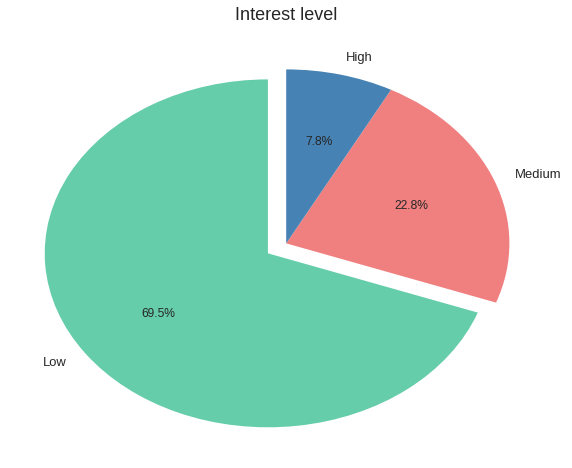

In [8]:
plt.subplots(figsize=(10, 8))
sizes = train['interest_level'].value_counts().values
patches, texts, autotexts= plt.pie(sizes, labels=['Low', 'Medium', 'High'],
                                  colors=['mediumaquamarine','lightcoral', 'steelblue'],
                                  explode=[0.1, 0, 0], autopct="%1.1f%%", 
                                  startangle=90)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[2].set_fontsize(13)
plt.title('Interest level', fontsize=18)
plt.show()

In [5]:
from wordcloud import WordCloud
text = ''
text_dispadd = ''
text_street = ''
text_desc =''
for ind, row in train.iterrows():
    for feature in row['features']:
        text = " ".join([text, "_".join(feature.strip().split(" "))])
    text_dispadd = " ".join([text_dispadd,"_".join(row['display_address'].strip().split(" "))])
    text_street = " ".join([text_street, row['street_address']])
    text_desc=" ".join([text_desc, row['description']])
text = text.strip()
text_dispadd = text_dispadd.strip()
text_street = text_street.strip()
text_desc = text_desc.strip()

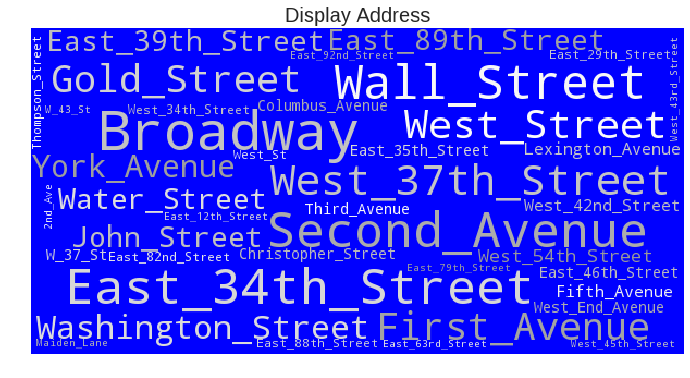

In [7]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


# wordcloud for display address
plt.figure(figsize=(12,6))
wc = WordCloud(background_color='blue', width=600, height=300,
                      max_font_size=50, max_words=40).generate(text_dispadd)
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
#plt.imshow(wc)
plt.title("Display Address", fontsize=20)
plt.axis("off")
plt.show();

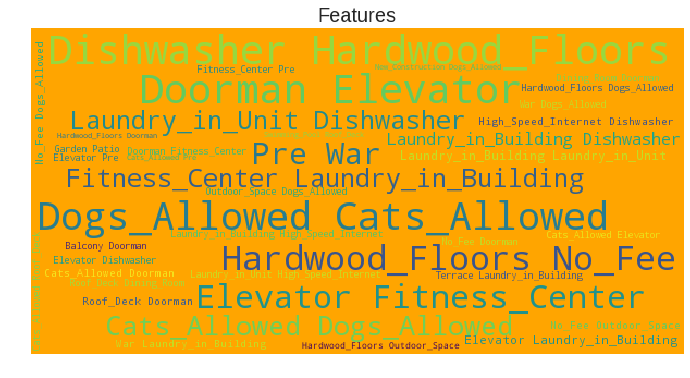

In [9]:
plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='orange', width=600, height=300,
                      max_font_size=50, max_words=40).generate(text)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Features", fontsize=20)
plt.axis("off")
plt.show()

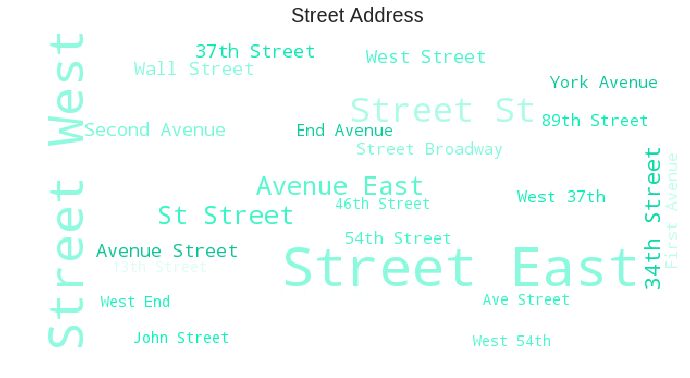

In [10]:
def green_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(165, 90%%, %d%%)" % random.randint(39, 145)


# wordcloud for street address
plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='white', width=600, height=300,
                      max_font_size=50, max_words=40).generate(text_street)
wordcloud.recolor(color_func=green_color_func, random_state=8)
plt.imshow(wordcloud)
plt.title("Street Address", fontsize=20)
plt.axis("off")
plt.show()

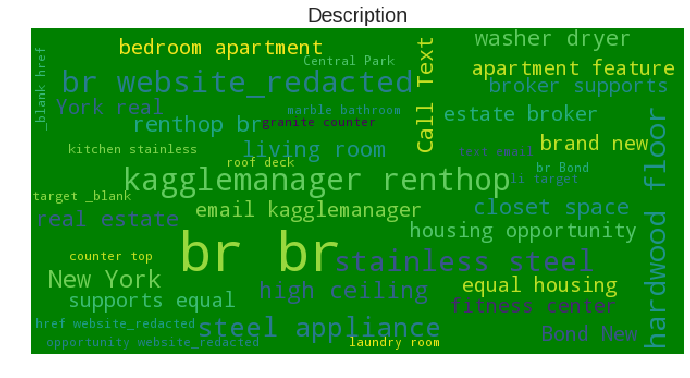

In [11]:
plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='green', width=600, height=300,
                      max_font_size=50, max_words=40).generate(text_desc)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Description", fontsize=20)
plt.axis("off")
plt.show()


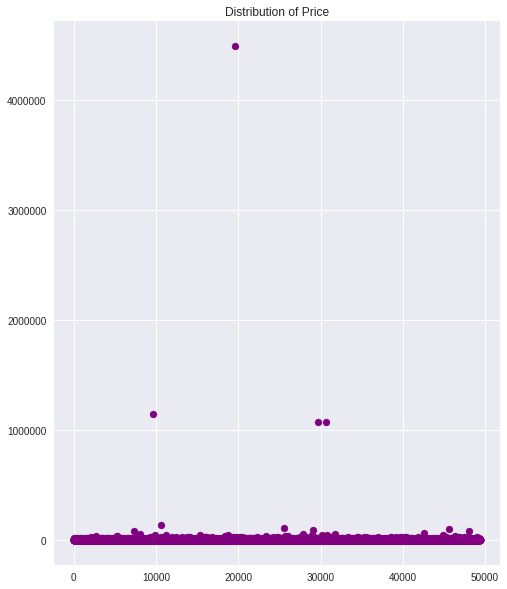

In [12]:
plt.figure(figsize=(8, 10))
plt.scatter(range(train.shape[0]), train["price"].values,color='purple')
plt.title("Distribution of Price");



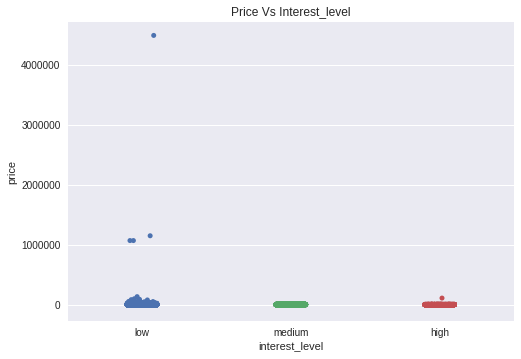

In [13]:
order = ['low', 'medium', 'high']
sns.stripplot(train["interest_level"],train["price"],jitter=True,order=order)
plt.title("Price Vs Interest_level");

/home/seshaditya/anaconda2/lib/python2.7/site-packages/pandas/tools/plotting.py:983: UserWarning:

'colors' is being deprecated. Please use 'color'instead of 'colors'



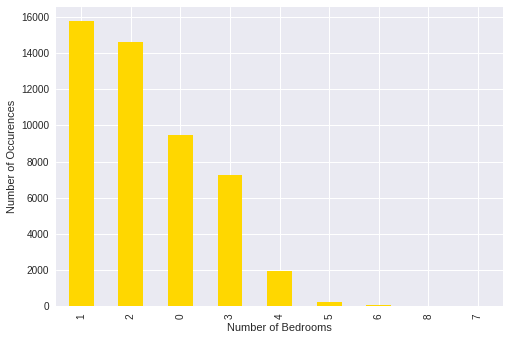

In [14]:
train["bedrooms"].value_counts().plot(kind='bar',colors='gold')
plt.ylabel("Number of Occurences")
plt.xlabel("Number of Bedrooms");


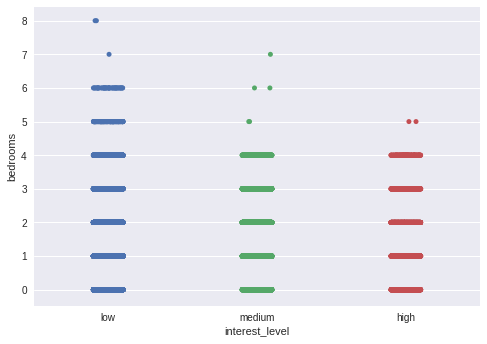

In [15]:
sns.stripplot(y="bedrooms", x="interest_level",data=train,jitter=True,order=order);

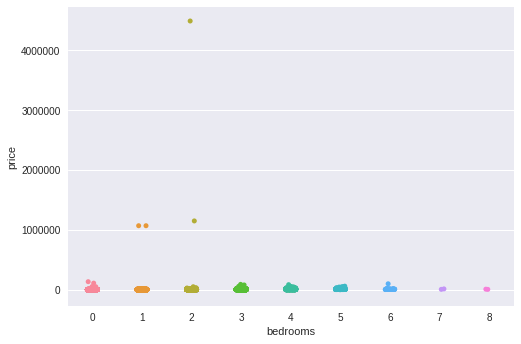

In [16]:
sns.stripplot(x="bedrooms", y="price",data=train,jitter=True);

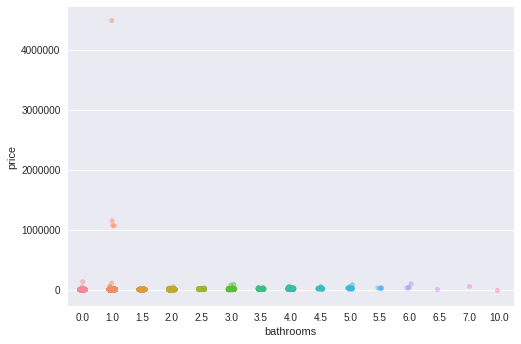

In [17]:
sns.stripplot(x="bathrooms", y="price",data=train, alpha=.5,jitter=True);

In [18]:
train['num_photos'] = train['photos'].apply(len)
train['num_features'] = train['features'].apply(len)
train['num_description_words'] = train['description'].apply(lambda x: len(x.split(' ')))
train['num_description_len'] = train['description'].apply(len)

In [19]:
train['created'] = pd.to_datetime(train['created'])
train['date'] = train['created'].dt.date
train["year"] = train["created"].dt.year
train['month'] = train['created'].dt.month
train['day'] = train['created'].dt.day
train['hour'] = train['created'].dt.hour
train['weekday'] = train['created'].dt.weekday
train['week'] = train['created'].dt.week
train['quarter'] = train['created'].dt.quarter
train['weekend'] = ((train['weekday'] == 5) & (train['weekday'] == 6))
train['wd'] = ((train['weekday'] != 5) & (train['weekday'] != 6))



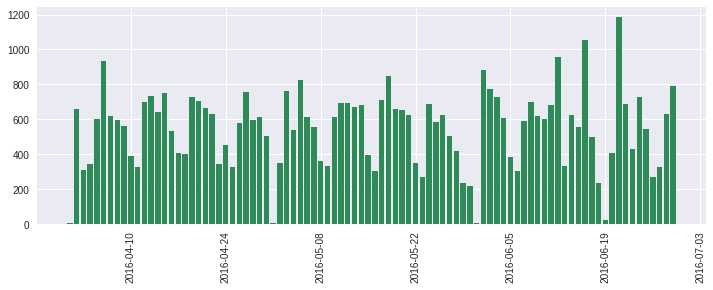

In [20]:
cnt_srs = train['date'].value_counts()

plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values, color='seagreen')
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()


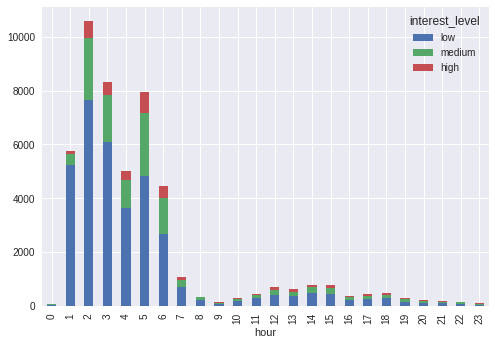

In [21]:
hourDF = train.groupby(['hour', 'interest_level'])['hour'].count().unstack('interest_level').fillna(0)
hourDF[['low','medium',"high"]].plot(kind='bar', stacked=True);

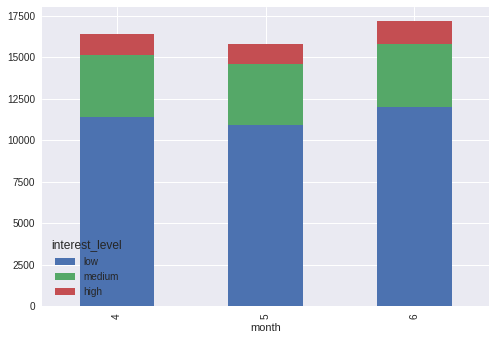

In [22]:
monthDF = train.groupby(['month', 'interest_level'])['month'].count().unstack('interest_level').fillna(0)
monthDF[['low','medium',"high"]].plot(kind='bar', stacked=True);


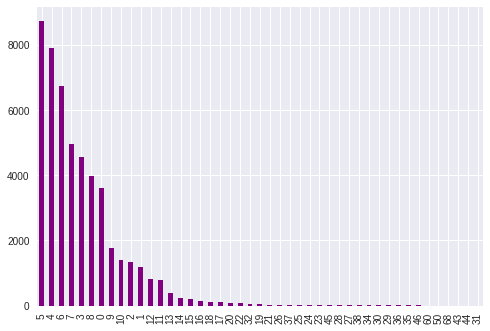

In [23]:
train.num_photos.value_counts().plot(kind='bar',color='purple')

/home/seshaditya/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



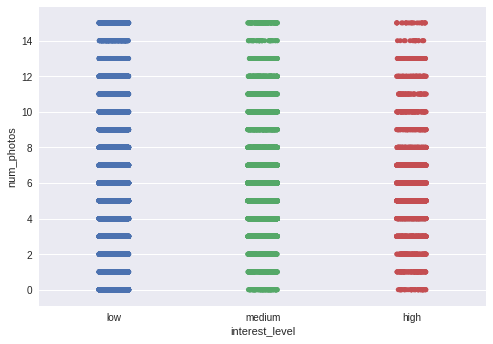

In [24]:
train['num_photos'].ix[train['num_photos']>15] = 15
sns.stripplot(y="num_photos", x="interest_level",data=train,jitter=True,order=order);

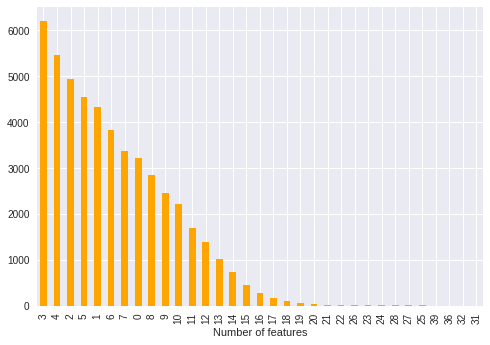

In [25]:
train.num_features.value_counts().plot(kind='bar',color='orange')
plt.xlabel("Number of features")


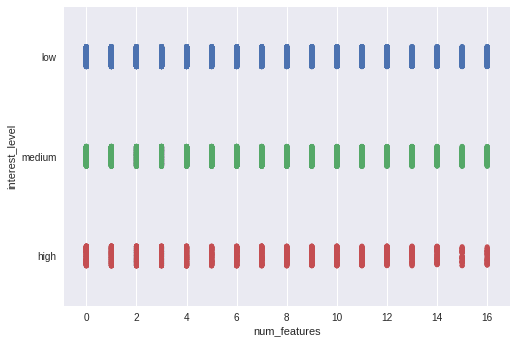

In [26]:
train['num_features'].ix[train['num_features'] > 16] = 16
sns.stripplot(x="num_features", y="interest_level",data=train,jitter=True,order=order);

In [27]:
hover_text = []
bubble_size = []
slope = 2.8
for index, row in train.iterrows():
    hover_text.append(('Interest: {interest}<br>'+
                      'Bedrooms: {bedrooms}<br>'+
                      'Price: {price}<br>'+
                      'Bathrooms: {bathrooms}<br>'+
                      'Year: {year}').format(interest=row['interest_level'],
                                            bedrooms=row['bedrooms'],
                                            price=row['price'],
                                            bathrooms=row['bathrooms'],
                                            year=row['created']))
    bubble_size.append(len(row['features'])*slope)

train['text'] = hover_text
train['bubble_size'] = bubble_size


In [28]:
trace0 = go.Scatter(
    y=train['bedrooms'][train['interest_level'] == 'low'],
    x=train['price'][train['interest_level'] == 'low'],
    mode='markers',
    name='low',
    text=train['text'][train['interest_level'] == 'low'],
    marker=dict(
        sizemode='diameter',
        sizeref=0.85,
        size=train['bubble_size'][train['interest_level'] == 'low'],
        line=dict(
            width=2
        ),
    )
)

trace1 = go.Scatter(
    y=train['bedrooms'][train['interest_level'] == 'medium'],
    x=train['price'][train['interest_level'] == 'medium'],
    mode='markers',
    name='medium',
    text=train['text'][train['interest_level'] == 'medium'],
   marker=dict(
        sizemode='diameter',
        sizeref=0.85,
        size=train['bubble_size'][train['interest_level'] == 'medium'],
        line=dict(
            width=2
        ),
    )
)

trace2 = go.Scatter(
    y=train['bedrooms'][train['interest_level'] == 'high'],
    x=train['price'][train['interest_level'] == 'high'],
    mode='markers',
    name='high',
    text=train['text'][train['interest_level'] == 'high'],
    marker=dict(
        sizemode='diameter',
        sizeref=0.85,
        size=train['bubble_size'][train['interest_level'] == 'high'],
        line=dict(
            width=2
        ),
    )
)

data = [trace0,trace1,trace2]

layout = go.Layout(
    title='Number of Bedrooms vs Price',
    xaxis=dict(
        title='Price (in dollars)',
        gridcolor='rgb(255, 255, 255)',
        range=[2.003297660701705, 5.191505530708712],
        type='log',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Number of Bedrooms',
        gridcolor='rgb(255, 255, 255)',
        range=[0.12621671352166, 8.72921793264332],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)


fig = dict(data=data, layout=layout)
iplot(fig, filename='bubblechart-color')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
